## Affine Transformation via Matrix Application


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let us consider vector v

v = np.array([3, 1])
v

array([3, 1])

In [7]:
def plot_vector(vectors, colors):
    plt.figure()
    plt.axvline(x=0, color="lightgray")
    plt.axhline(y=0, color="lightgray")

    for i in range(len(vectors)):
        x = np.concatenate(([0, 0], vectors[i]))
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]], angles="xy", scale_units="xy", scale=1, color=colors[i])
    

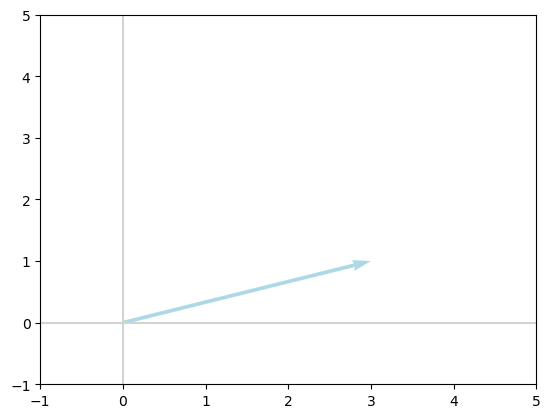

In [9]:
plot_vector([v], ["lightblue"])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, eg: rotate it or rescale it.

Identity matrix is the exception that proves the rule: Applying an identity matrix does not transform a vector:

In [10]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [12]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [13]:
v == Iv

array([ True,  True])

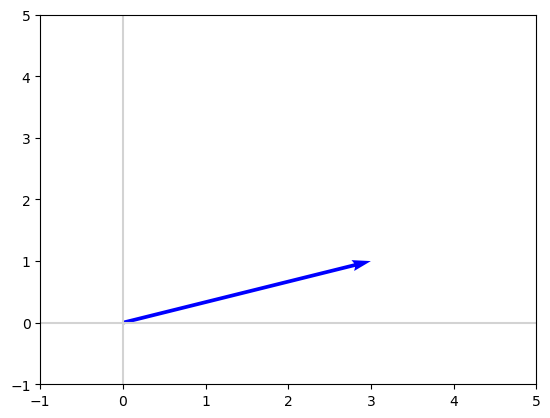

In [14]:
plot_vector([Iv], ["blue"])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, let us consider matrix $E$, that flips the vectors over $x$-axis when we apply to vector to matrix $E$

In [20]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [21]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

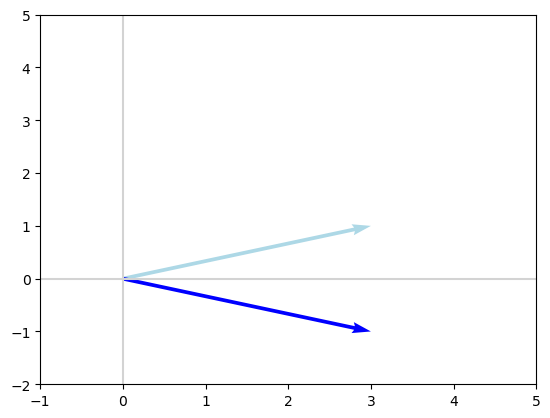

In [22]:
plot_vector([v, Ev], ["lightblue", "blue"])
plt.xlim(-1, 5)
_ = plt.ylim(-2, 5)

Now, let us consider matrix $F$, that flips the vectors over $y$-axis when we apply the vector to matrix $F$

In [23]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [25]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

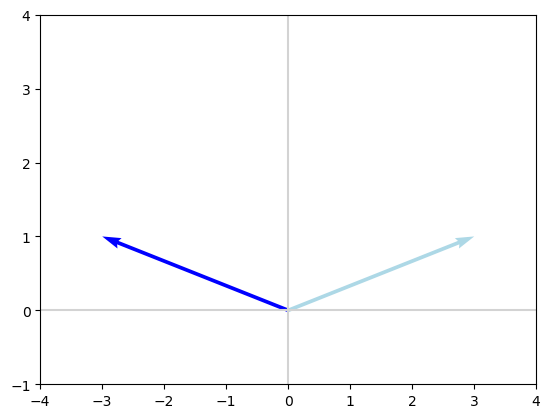

In [27]:
plot_vector([v, Fv], ["lightblue", "blue"])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 4)

Applying a flipping matrix is an example of **affine transformation**: a change in geometry that may adjust distance or angles between vectors, but preseved parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., reflection) other common affine transformations include:
- Scaling (changing the length of vectors)
- Shearing 
- Rotation

[here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) - blog post on affine transformation

Single matrix can apply multiple affine transforms simultaniously (eg: flip over an axis and rotate 45 degrees). As an example let's see what happens when we apply this matrix $A$ to vector $v$:

In [28]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [29]:
Av = np.dot(A, v)
Av

array([1, 4])

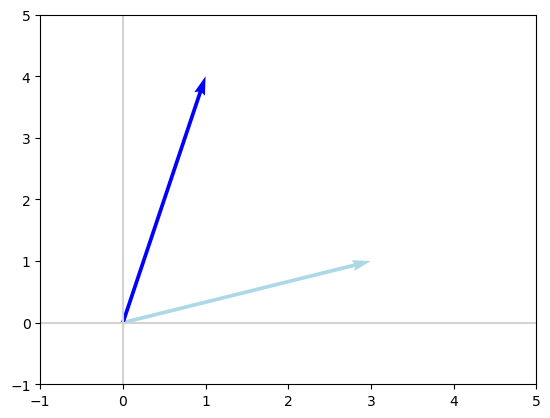

In [30]:
plot_vector([v, Av], ["lightblue", "blue"])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

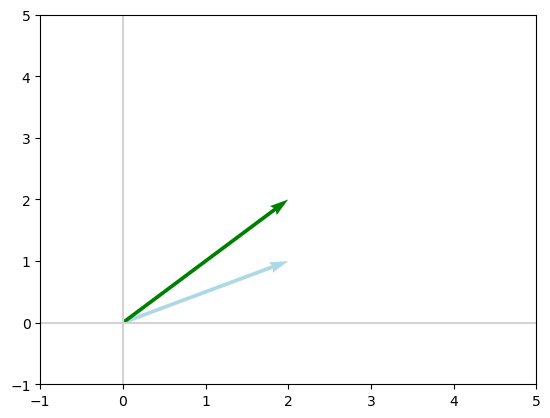

In [32]:
# Another example

v2 = np.array([2,1])

plot_vector([v2, np.dot(A, v2)], ["lightblue", "green"])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a metrix say V, where each column is a separate vector. Then, whatever linear transformation we apply to V will be independently be applied to each column vector:

In [39]:
v3 = np.array([-3, -1])
v4 = np.array([-1, 1])
v, v2, v3, v4

(array([3, 1]), array([2, 1]), array([-3, -1]), array([-1,  1]))

In [40]:
vT = np.matrix(v).T
v2T = np.matrix(v2).T
v3T = np.matrix(v3).T
v4T = np.matrix(v4).T
vT, v2T, v3T, v4T

(matrix([[3],
         [1]]),
 matrix([[2],
         [1]]),
 matrix([[-3],
         [-1]]),
 matrix([[-1],
         [ 1]]))

In [42]:
# V = np.column_stack((vT, v2T, v3T, v4T))
V = np.concatenate((vT, v2T, v3T, v4T), axis=1)
V



matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [43]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [45]:
A

array([[-1,  4],
       [ 2, -2]])

In [44]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [50]:
# function to convert column of matrix into vector (1D)
def col_to_vec(matrix,col):
    return np.array(matrix[:,col]).reshape(-1)

In [51]:
col_to_vec(AV, 0)

array([1, 4])

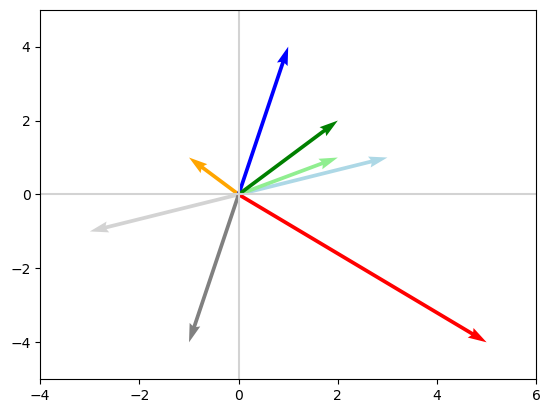

In [52]:
plot_vector([col_to_vec(V, 0), col_to_vec(V, 1), col_to_vec(V, 2), col_to_vec(V, 3),
            col_to_vec(AV, 0), col_to_vec(AV, 1), col_to_vec(AV, 2), col_to_vec(AV, 3)],
            ["lightblue", "lightgreen", "lightgray", "orange", "blue", "green", "gray", "red"])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)